# 1. Analyse Exploratoire de la Data

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Charger les deux fichiers
data_with_target = pd.read_csv("german_credit_data_with_target.csv")
data_without_target = pd.read_csv("german_credit_data.csv")

In [6]:
# Vérifier les dimensions des fichiers
print(f"Dimensions du fichier avec cible : {data_with_target.shape}")
print(f"Dimensions du fichier sans cible : {data_without_target.shape}")

Dimensions du fichier avec cible : (1000, 11)
Dimensions du fichier sans cible : (1000, 10)


In [7]:
# Vérifier les colonnes spécifiques
print("\nColonnes dans le fichier avec cible :")
print(data_with_target.columns)


Colonnes dans le fichier avec cible :
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [34]:
print("\nColonnes dans le fichier sans cible :")
print(data_without_target.columns)


Colonnes dans le fichier sans cible :
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [10]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes dans le fichier avec cible :")
print(data_with_target.isnull().sum())


Valeurs manquantes dans le fichier avec cible :
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [11]:
print("\nValeurs manquantes dans le fichier sans cible :")
print(data_without_target.isnull().sum())


Valeurs manquantes dans le fichier sans cible :
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [ ]:
# print(data_without_target

In [14]:


from sklearn.impute import SimpleImputer

# Imputation pour les colonnes catégoriques avec la mode
cat_imputer = SimpleImputer(strategy='most_frequent')

# Appliquer l'imputation et corriger la forme de la sortie
data_with_target['Saving accounts'] = cat_imputer.fit_transform(data_with_target[['Saving accounts']]).ravel()
data_with_target['Checking account'] = cat_imputer.fit_transform(data_with_target[['Checking account']]).ravel()

# Vérifier s'il reste des valeurs manquantes
print("\nValeurs manquantes après imputation (fichier avec cible) :")
print(data_with_target.isnull().sum())



Valeurs manquantes après imputation (fichier avec cible) :
Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


In [15]:
data_without_target['Saving accounts'] = cat_imputer.fit_transform(data_without_target[['Saving accounts']]).ravel()
data_without_target['Checking account'] = cat_imputer.fit_transform(data_without_target[['Checking account']]).ravel()

print("\nValeurs manquantes après imputation (fichier sans cible) :")
print(data_without_target.isnull().sum())



Valeurs manquantes après imputation (fichier sans cible) :
Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


In [39]:
# pip install seaborn --upgrade

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
data = pd.read_csv("german_credit_data_with_target.csv")

In [17]:
print("Colonnes dans le DataFrame :")
print(data.columns)


Colonnes dans le DataFrame :
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


## A. Visualisation de la Data

C:\Users\WANE\AppData\Local\Temp\ipykernel_12764\268985034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Risk', palette='coolwarm')


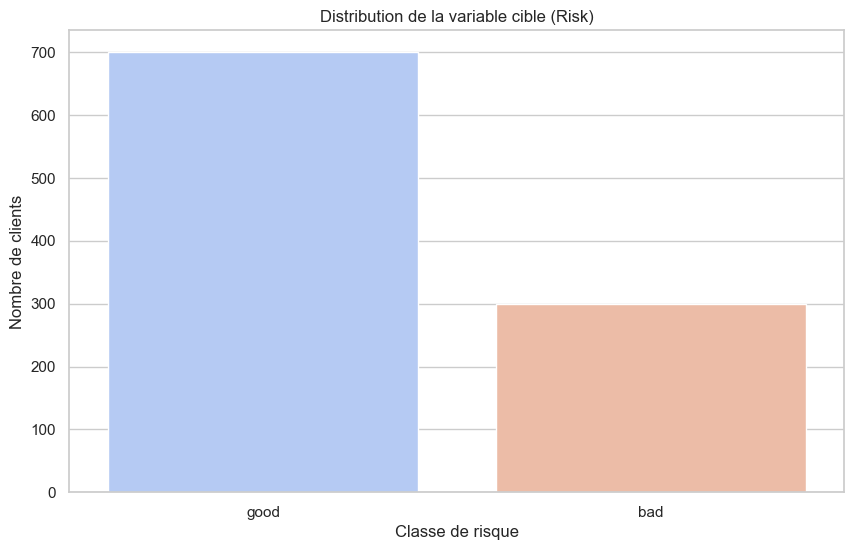

In [18]:
# Ajuster les paramètres pour de meilleures visualisations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Distribution de la variable cible 'Risk'
plt.figure()
sns.countplot(data=data, x='Risk', palette='coolwarm')
plt.title("Distribution de la variable cible (Risk)")
plt.xlabel("Classe de risque")
plt.ylabel("Nombre de clients")
plt.show()

In [43]:
# Distribution des variables numériques
# num_cols = ['Age', 'Credit amount', 'Duration']
# for col in num_cols:
#    plt.figure()
#    sns.histplot(data[col], kde=True, color='teal', bins=30)
#   plt.title(f"Distribution de {col}")
#   plt.xlabel(col)
#    plt.ylabel("Fréquence")
#   plt.show()

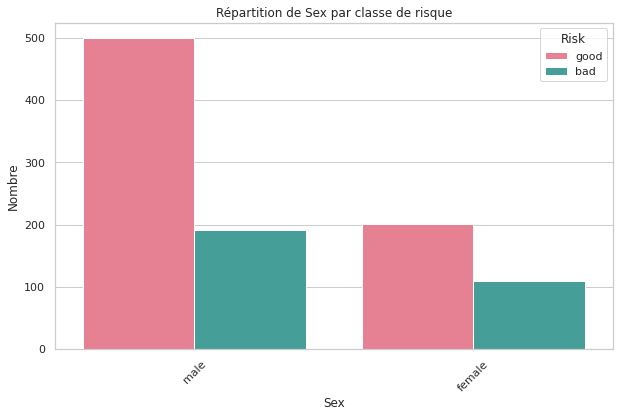

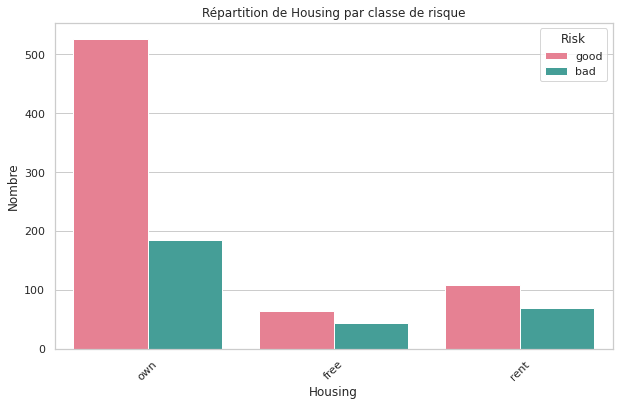

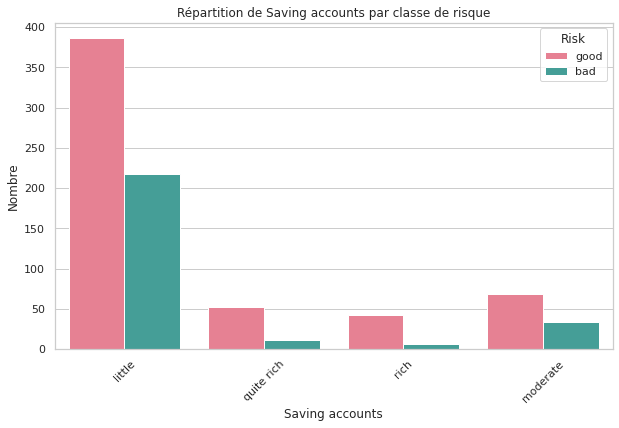

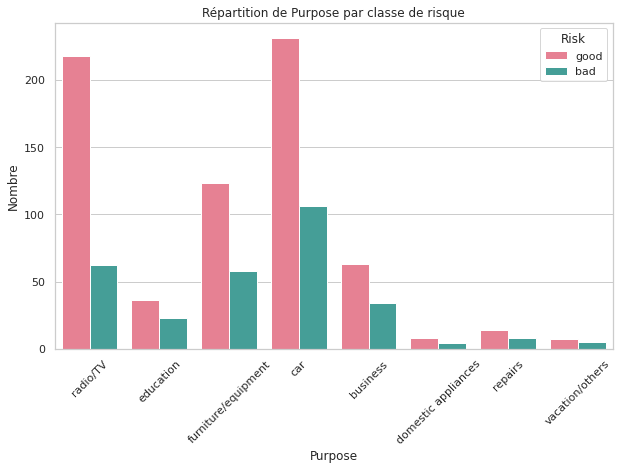

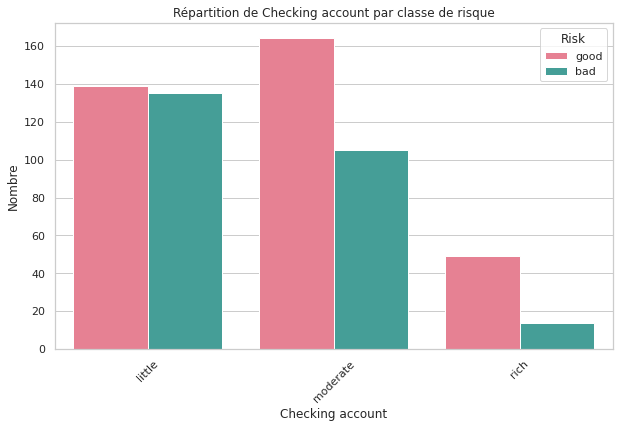

In [44]:

# Analyse des relations entre variables catégoriques et cible
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Purpose', 'Checking account']
for col in cat_cols:
    plt.figure()
    sns.countplot(data=data, x=col, hue='Risk', palette='husl')
    plt.title(f"Répartition de {col} par classe de risque")
    plt.xlabel(col)
    plt.ylabel("Nombre")
    plt.xticks(rotation=45)
    plt.legend(title="Risk", loc="upper right")
    plt.show()

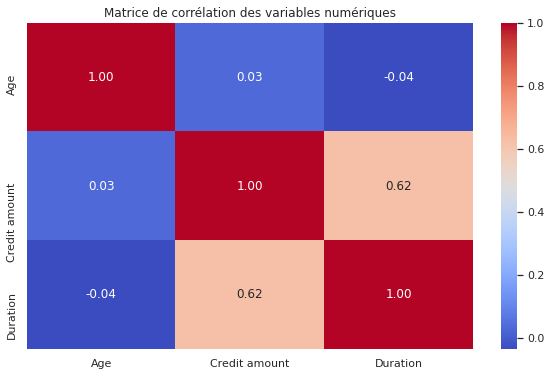

In [45]:
# Matrice de corrélation pour les variables numériques
plt.figure()
sns.heatmap(data[num_cols + ['Risk']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation des variables numériques")
plt.show()

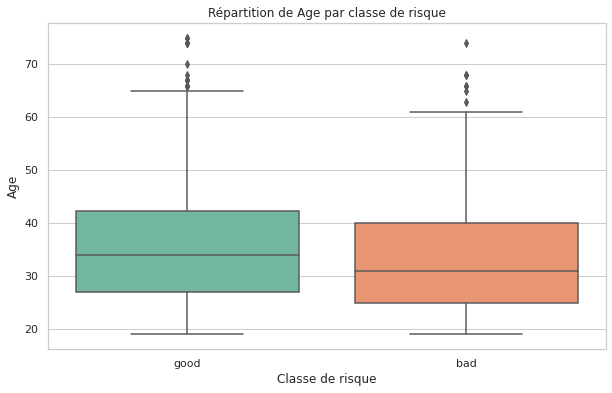

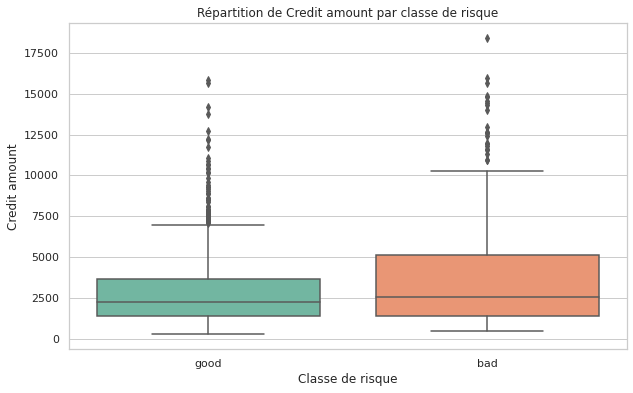

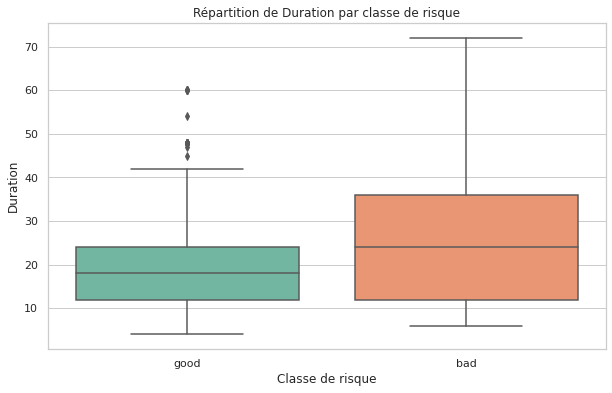

In [46]:
# Boxplots pour analyser la relation des variables numériques avec la cible
for col in num_cols:
    plt.figure()
    sns.boxplot(data=data, x='Risk', y=col, palette='Set2')
    plt.title(f"Répartition de {col} par classe de risque")
    plt.xlabel("Classe de risque")
    plt.ylabel(col)
    plt.show()

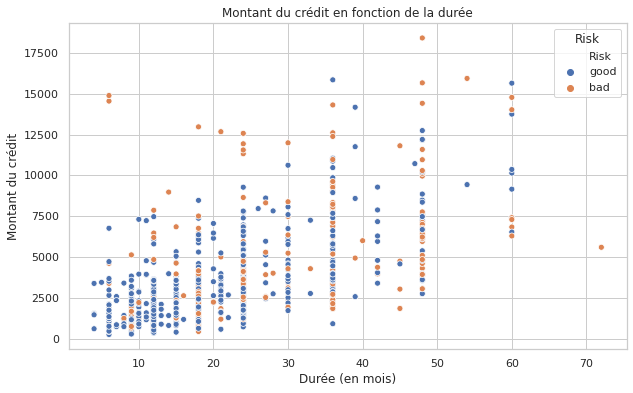

In [47]:
# Scatterplot pour explorer la relation entre 'Credit amount' et 'Duration'
plt.figure()
sns.scatterplot(data=data, x='Duration', y='Credit amount', hue='Risk', palette='deep')
plt.title("Montant du crédit en fonction de la durée")
plt.xlabel("Durée (en mois)")
plt.ylabel("Montant du crédit")
plt.legend(title="Risk", loc="upper right")
plt.show()

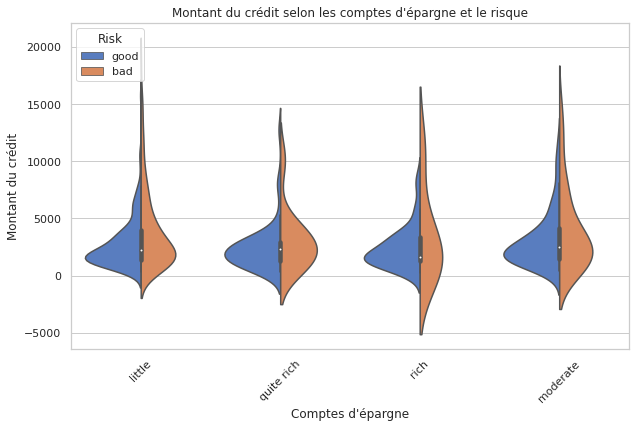

In [48]:
# Distribution des comptes d'épargne par classe de risque
plt.figure()
sns.violinplot(data=data, x='Saving accounts', y='Credit amount', hue='Risk', split=True, palette='muted')
plt.title("Montant du crédit selon les comptes d'épargne et le risque")
plt.xlabel("Comptes d'épargne")
plt.ylabel("Montant du crédit")
plt.xticks(rotation=45)
plt.legend(title="Risk", loc="upper left")
plt.show()


# 2. Préparation des Données

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
data_with_target = pd.read_csv("german_credit_data_with_target.csv")

In [3]:
# Supprimer la colonne "Unnamed: 0"
if 'Unnamed: 0' in data_with_target.columns:
    data_with_target = data_with_target.drop(columns=['Unnamed: 0'])

# Imputation pour les colonnes catégoriques avec la mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data_with_target['Saving accounts'] = cat_imputer.fit_transform(data_with_target[['Saving accounts']]).ravel()
data_with_target['Checking account'] = cat_imputer.fit_transform(data_with_target[['Checking account']]).ravel()

# Vérifier s'il reste des valeurs manquantes
print("\nValeurs manquantes après imputation (fichier avec cible) :")
print(data_with_target.isnull().sum())


Valeurs manquantes après imputation (fichier avec cible) :
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


In [20]:
# Définir les variables catégoriques et numériques
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
num_cols = ['Age', 'Credit amount', 'Duration']

# Séparer les features (X) et la cible (y)
X = data_with_target.drop(columns=['Risk'])
y = data_with_target['Risk'].apply(lambda x: 1 if x == 'bad' else 0)  # 1 = bad, 0 = good

# Afficher la forme des données après suppression de la colonne
print(f"Forme de X après suppression de 'Unnamed: 0' : {X.shape}")

Forme de X après suppression de 'Unnamed: 0' : (1000, 9)


In [21]:
# Pipeline pour la préparation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Standardisation des numériques
        ('cat', OneHotEncoder(drop='first'), cat_cols)  # Encodage des catégoriques
    ])


In [22]:
# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [23]:
# Prétraitement des données
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Préparation des données terminée.")


Préparation des données terminée.


# 3. Entraîner un Modèle (Random Forest)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [29]:
# Entraîner un modèle Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [30]:
# Prédictions sur le jeu de test
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [31]:
# Évaluation du modèle
print("Classification Report :")
print(classification_report(y_test, y_pred))

print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

print("AUC-ROC Score :", roc_auc_score(y_test, y_proba))


Classification Report :
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       140
           1       0.59      0.27      0.37        60

    accuracy                           0.73       200
   macro avg       0.67      0.59      0.60       200
weighted avg       0.70      0.72      0.69       200

Confusion Matrix :
[[129  11]
 [ 44  16]]
AUC-ROC Score : 0.6377380952380952


# 4. Gestion du déséquilibre des classes avec SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [33]:
# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [34]:
print("Avant SMOTE :")
print(y_train.value_counts())
print("Après SMOTE :")
print(pd.Series(y_resampled).value_counts())

Avant SMOTE :
Risk
0    560
1    240
Name: count, dtype: int64
Après SMOTE :
Risk
1    560
0    560
Name: count, dtype: int64


In [35]:
# Entraîner un modèle Random Forest avec les données équilibrées
rf_model_smote = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_smote.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [36]:
# Prédictions sur le jeu de test
y_pred_smote = rf_model_smote.predict(X_test)
y_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]

In [37]:
print("\nClassification Report après SMOTE :")
print(classification_report(y_test, y_pred_smote))

print("Confusion Matrix après SMOTE :")
print(confusion_matrix(y_test, y_pred_smote))

print("AUC-ROC Score après SMOTE :", roc_auc_score(y_test, y_proba_smote))



Classification Report après SMOTE :
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       140
           1       0.44      0.37      0.40        60

    accuracy                           0.67       200
   macro avg       0.59      0.58      0.59       200
weighted avg       0.65      0.67      0.66       200

Confusion Matrix après SMOTE :
[[112  28]
 [ 38  22]]
AUC-ROC Score après SMOTE : 0.5908333333333333


# le sous-échantillonnage pour équilibrer les classes

In [80]:
from imblearn.under_sampling import RandomUnderSampler

# Appliquer le sous-échantillonnage pour équilibrer les classes
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

In [81]:
print("Avant sous-échantillonnage :")
print(y_train.value_counts())
print("Après sous-échantillonnage :")
print(pd.Series(y_under).value_counts())

Avant sous-échantillonnage :
0    560
1    240
Name: Risk, dtype: int64
Après sous-échantillonnage :
1    240
0    240
Name: Risk, dtype: int64


In [82]:
# Entraîner un modèle Random Forest avec les données sous-échantillonnées
rf_model_rus = RandomForestClassifier(random_state=42)
rf_model_rus.fit(X_under, y_under)

RandomForestClassifier(random_state=42)

In [83]:
# Prédictions sur le jeu de test
y_pred_rus = rf_model_rus.predict(X_test)
y_proba_rus = rf_model_rus.predict_proba(X_test)[:, 1]

In [84]:
print("\nClassification Report après sous-échantillonnage :")
print(classification_report(y_test, y_pred_rus))

print("Confusion Matrix après sous-échantillonnage :")
print(confusion_matrix(y_test, y_pred_rus))

print("AUC-ROC Score après sous-échantillonnage :", roc_auc_score(y_test, y_proba_rus))



Classification Report après sous-échantillonnage :
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       140
           1       0.39      0.62      0.48        60

    accuracy                           0.60       200
   macro avg       0.59      0.60      0.58       200
weighted avg       0.67      0.60      0.62       200

Confusion Matrix après sous-échantillonnage :
[[83 57]
 [23 37]]
AUC-ROC Score après sous-échantillonnage : 0.657797619047619


# 5. XGBoost avec gestion du déséquilibre

In [9]:
from xgboost import XGBClassifier

# Entraîner un modèle XGBoost avec gestion du déséquilibre
xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [10]:
# Prédictions sur le jeu de test
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [13]:


print("\nClassification Report pour XGBoost :")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix pour XGBoost :")
print(confusion_matrix(y_test, y_pred_xgb))

print("AUC-ROC Score pour XGBoost :", roc_auc_score(y_test, y_proba_xgb))



Classification Report pour XGBoost :
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       140
           1       0.42      0.42      0.42        60

    accuracy                           0.65       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.65      0.65      0.65       200

Confusion Matrix pour XGBoost :
[[105  35]
 [ 35  25]]
AUC-ROC Score pour XGBoost : 0.6494047619047619


# 6. Optimisation avec XGBoost 

In [24]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'scale_pos_weight': [2, 3, 4]  # Ajustement du déséquilibre
}


In [25]:
# GridSearchCV pour XGBoost
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'scale_pos_weight': [2, 3, 4]},
             scoring='roc_auc', verbose=1)

In [26]:
# Meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'scale_pos_weight': 2}


In [27]:
# Évaluer le modèle optimisé
best_xgb = grid_search.best_estimator_
y_pred_opt = best_xgb.predict(X_test)
y_proba_opt = best_xgb.predict_proba(X_test)[:, 1]

In [28]:
print("\nClassification Report pour XGBoost optimisé :")
print(classification_report(y_test, y_pred_opt))

print("Confusion Matrix pour XGBoost optimisé :")
print(confusion_matrix(y_test, y_pred_opt))

print("AUC-ROC Score pour XGBoost optimisé :", roc_auc_score(y_test, y_proba_opt))



Classification Report pour XGBoost optimisé :
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       140
           1       0.51      0.57      0.54        60

    accuracy                           0.70       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.72      0.70      0.71       200

Confusion Matrix pour XGBoost optimisé :
[[107  33]
 [ 26  34]]
AUC-ROC Score pour XGBoost optimisé : 0.6816666666666666


# Enregistrement du Mélde XGBoost 

In [29]:
import joblib

# Enregistrer le modèle optimisé
model_path = "Modéle/xgboost_optimized_model.pkl"
joblib.dump(best_xgb, model_path)

print(f"Modèle optimisé enregistré sous : {model_path}")


Modèle optimisé enregistré sous : Modéle/xgboost_optimized_model.pkl


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols),
    ]
)

X_train = pd.DataFrame(
    preprocessor.fit_transform(X_train),
    columns=preprocessor.get_feature_names_out()
)


ValueError: Specifying the columns using strings is only supported for pandas DataFrames